## Семантическое картирование. Вариант 1

Куканова Абина, БКЛ-212

In [139]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [141]:
# Импортируем нужные библиотеки
from nltk.corpus import wordnet as wn
wn.add_omw()
#wn.langs()

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import euclidean_distances
from sklearn import manifold

##### Шаг №1
Возьмите свой датасет из дз 1 (тот набор узлов и ребёр, из которых состоял ваш первый граф) и превратите его в «типологическую» матрицу, в строках которой будут синсеты, в столбцах - слова, а на их пересечении - 0, если слово не относится к данному синсету, и 1, если относится.

In [179]:
# Возьмем синтет 'search.v.01', и вытащим из базы всех языков списки лемм, относящиеся в данному синтету.
lemmas_dict = {}
for name_lang in wn.langs():
    lemmas_dict[name_lang] = [str(lemma.name()) for lemma in wn.synset('search.v.01').lemmas(lang=name_lang)]

lemmas_dict

{'eng': ['search', 'seek', 'look_for'],
 'als': ['gjurmim', 'kërkim', 'kërkoj'],
 'arb': ['استشار',
  'استكشف',
  'اكتشف',
  'بحث',
  'بحث_في',
  'تقصى',
  'حاول',
  'حاول_إيجاد',
  'سبر',
  'سعى_لعمل_شئ',
  'طلب',
  'طمح_في',
  'فتش',
  'فحص',
  'قصد'],
 'bul': ['търся'],
 'cmn': ['寻找', '寻觅', '找', '找寻', '搜寻', '搜查', '搜索'],
 'dan': ['lede', 'søge'],
 'ell': ['ψάχνω'],
 'fin': ['etsiä'],
 'fra': ['chercher', 'rechercher'],
 'heb': ['חִפֵּשׂ'],
 'hrv': ['potražiti', 'pretražiti', 'pretraživati', 'tragati', 'tražiti'],
 'isl': ['leita_að', 'leita_eftir'],
 'ita': ['cercare'],
 'ita_iwn': [],
 'jpn': ['さがし回る',
  '尋ねる',
  '捜しもとめる',
  '捜し求める',
  '捜す',
  '捜索+する',
  '探しまわる',
  '探しもとめる',
  '探し回る',
  '探し求める',
  '探す',
  '探る'],
 'cat': ['buscar', 'cercar', 'escorcollar'],
 'eus': ['arakatu', 'erregistratu', 'miatu'],
 'glg': ['buscar', 'explorar', 'rexistrar'],
 'spa': ['buscar', 'explorar', 'registrar'],
 'ind': ['cari',
  'geledah',
  'memeriksa',
  'mencari',
  'mengacar',
  'mengemong',
  'meng

In [180]:
# Создадим словарь, в который будем записывать для каждой леммы из каждого языка список синтетов,
# к которым она относится.
synsets_dict = {}

for name_lang, lemmas in lemmas_dict.items():
    for lemma in lemmas:
        synsets_dict[lemma] = wn.synsets(lemma, pos=wn.VERB, lang=name_lang)

In [185]:
# Выберем те синтеты, к которым относятся больше 6 лемм из изначального списка
selected_synsets = []

for lemma, synsets in synsets_dict.items():
    for synset in synsets:
        synset_counter = 0
        for name_lang, lemmas in lemmas_dict.items():
            for lem in lemmas:
                if synset in wn.synsets(lem, pos=wn.VERB, lang=name_lang):
                    synset_counter += 1
            if synset_counter > 6:
                selected_synsets.append(synset)


final_synsets = list(set(selected_synsets))
final_synsets

[Synset('determine.v.08'),
 Synset('probe.v.01'),
 Synset('scout.v.01'),
 Synset('quest.v.01'),
 Synset('grope.v.02'),
 Synset('investigate.v.02'),
 Synset('seek.v.01'),
 Synset('search.v.04'),
 Synset('probe.v.02'),
 Synset('scan.v.02'),
 Synset('analyze.v.01'),
 Synset('dredge.v.02'),
 Synset('invite.v.01'),
 Synset('frisk.v.02'),
 Synset('quest.v.02'),
 Synset('comb.v.02'),
 Synset('learn.v.04'),
 Synset('search.v.02'),
 Synset('anticipate.v.05'),
 Synset('inspect.v.01'),
 Synset('size_up.v.01'),
 Synset('seek.v.04'),
 Synset('grope.v.01'),
 Synset('want.v.03'),
 Synset('determine.v.01'),
 Synset('search.v.01'),
 Synset('investigate.v.01'),
 Synset('examine.v.04'),
 Synset('find.v.05'),
 Synset('frolic.v.01'),
 Synset('examine.v.02'),
 Synset('quest_for.v.01'),
 Synset('seek.v.05'),
 Synset('test.v.01'),
 Synset('try.v.01'),
 Synset('cast_about.v.01'),
 Synset('research.v.02')]

In [186]:
matrix_data = {}
for syntet in final_synsets:
    matrix_data[syntet] = {}
    for name_lang, lemmas in lemmas_dict.items():
        for lemma in lemmas:
          if lemma in syntet.lemma_names(name_lang):
            matrix_data[syntet][lemma] = 1
          else:
            matrix_data[syntet][lemma] = 0

In [187]:
df = pd.DataFrame.from_dict(matrix_data, orient="index")
df.fillna(0, inplace=True)
df = df.astype(int)
df

,search,seek,look_for,gjurmim,kërkim,kërkoj,استشار,استكشف,اكتشف,بحث,...,leite,søke,lete,procurar,căuta,hľadať,pátrať,iskati,söka,ค้นหา
Synset('determine.v.08'),0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Synset('probe.v.01'),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Synset('scout.v.01'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Synset('quest.v.01'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
Synset('grope.v.02'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('investigate.v.02'),0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Synset('seek.v.01'),0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
Synset('search.v.04'),1,0,0,0,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
Synset('probe.v.02'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('scan.v.02'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Шаг 2 (max 1 балл).
Сократите размерность этой матрицы до 2 методом MDS, визуализируйте результат.

In [189]:
matrix = df.loc[:, 'search':'ค้นหา']
array = matrix.values
print (array.shape)

(37, 89)


In [190]:
similarities = euclidean_distances(array)
mds = manifold.MDS(n_components=2)
print (mds.fit(similarities).stress_)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


1257.4523388243342


In [191]:
array_mds = mds.fit_transform(array)
print (array_mds)

[[ 0.88992733 -1.02573812]
 [ 2.04119877 -1.86329642]
 [ 0.19629824  1.16297745]
 [-0.39866552  1.79661729]
 [-1.19555451 -0.09664702]
 [ 1.38787305 -2.1712637 ]
 [ 2.21092177  2.75118257]
 [-4.67510049 -0.14657423]
 [-0.38249507 -1.22535803]
 [-1.13704641 -1.29883135]
 [ 0.90831702 -2.06228805]
 [-1.91355598 -0.79800184]
 [ 1.91203465 -0.38358399]
 [-0.1073756  -0.18745433]
 [-0.35567408  1.14575455]
 [ 2.91162397 -0.35242041]
 [ 0.35863973 -1.66746343]
 [-3.2746744   4.74805901]
 [-0.81288546  0.69429674]
 [-0.47610611 -2.77377607]
 [-0.42138823 -2.19559691]
 [ 0.95219315  0.28744392]
 [-1.5304877  -0.03261476]
 [ 0.77195759  1.92736559]
 [ 1.2894384  -0.17189619]
 [-0.15489048  8.62964191]
 [ 0.76170222 -2.4941479 ]
 [-0.38249507 -1.22535803]
 [ 0.47085341  0.29397688]
 [-0.54071372 -0.05868992]
 [ 1.04887683 -1.70781857]
 [ 0.90408971  1.03580292]
 [ 1.81236564  1.04995141]
 [ 0.75015995 -1.39992147]
 [-2.36657843 -2.2791199 ]
 [ 1.66587222  0.55154231]
 [-3.11865639  1.54324806]]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


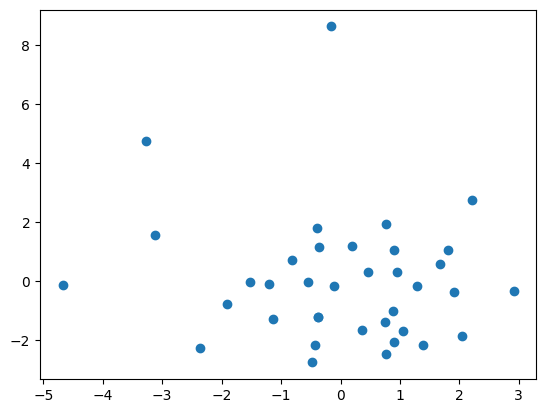

In [192]:
plt.scatter(array_mds[:, 0], array_mds[:, 1])
plt.show()

In [193]:
x = []
y = []
for pair in array_mds:
    x.append(pair[0])
    y.append(pair[1])
phrases = df.index.values

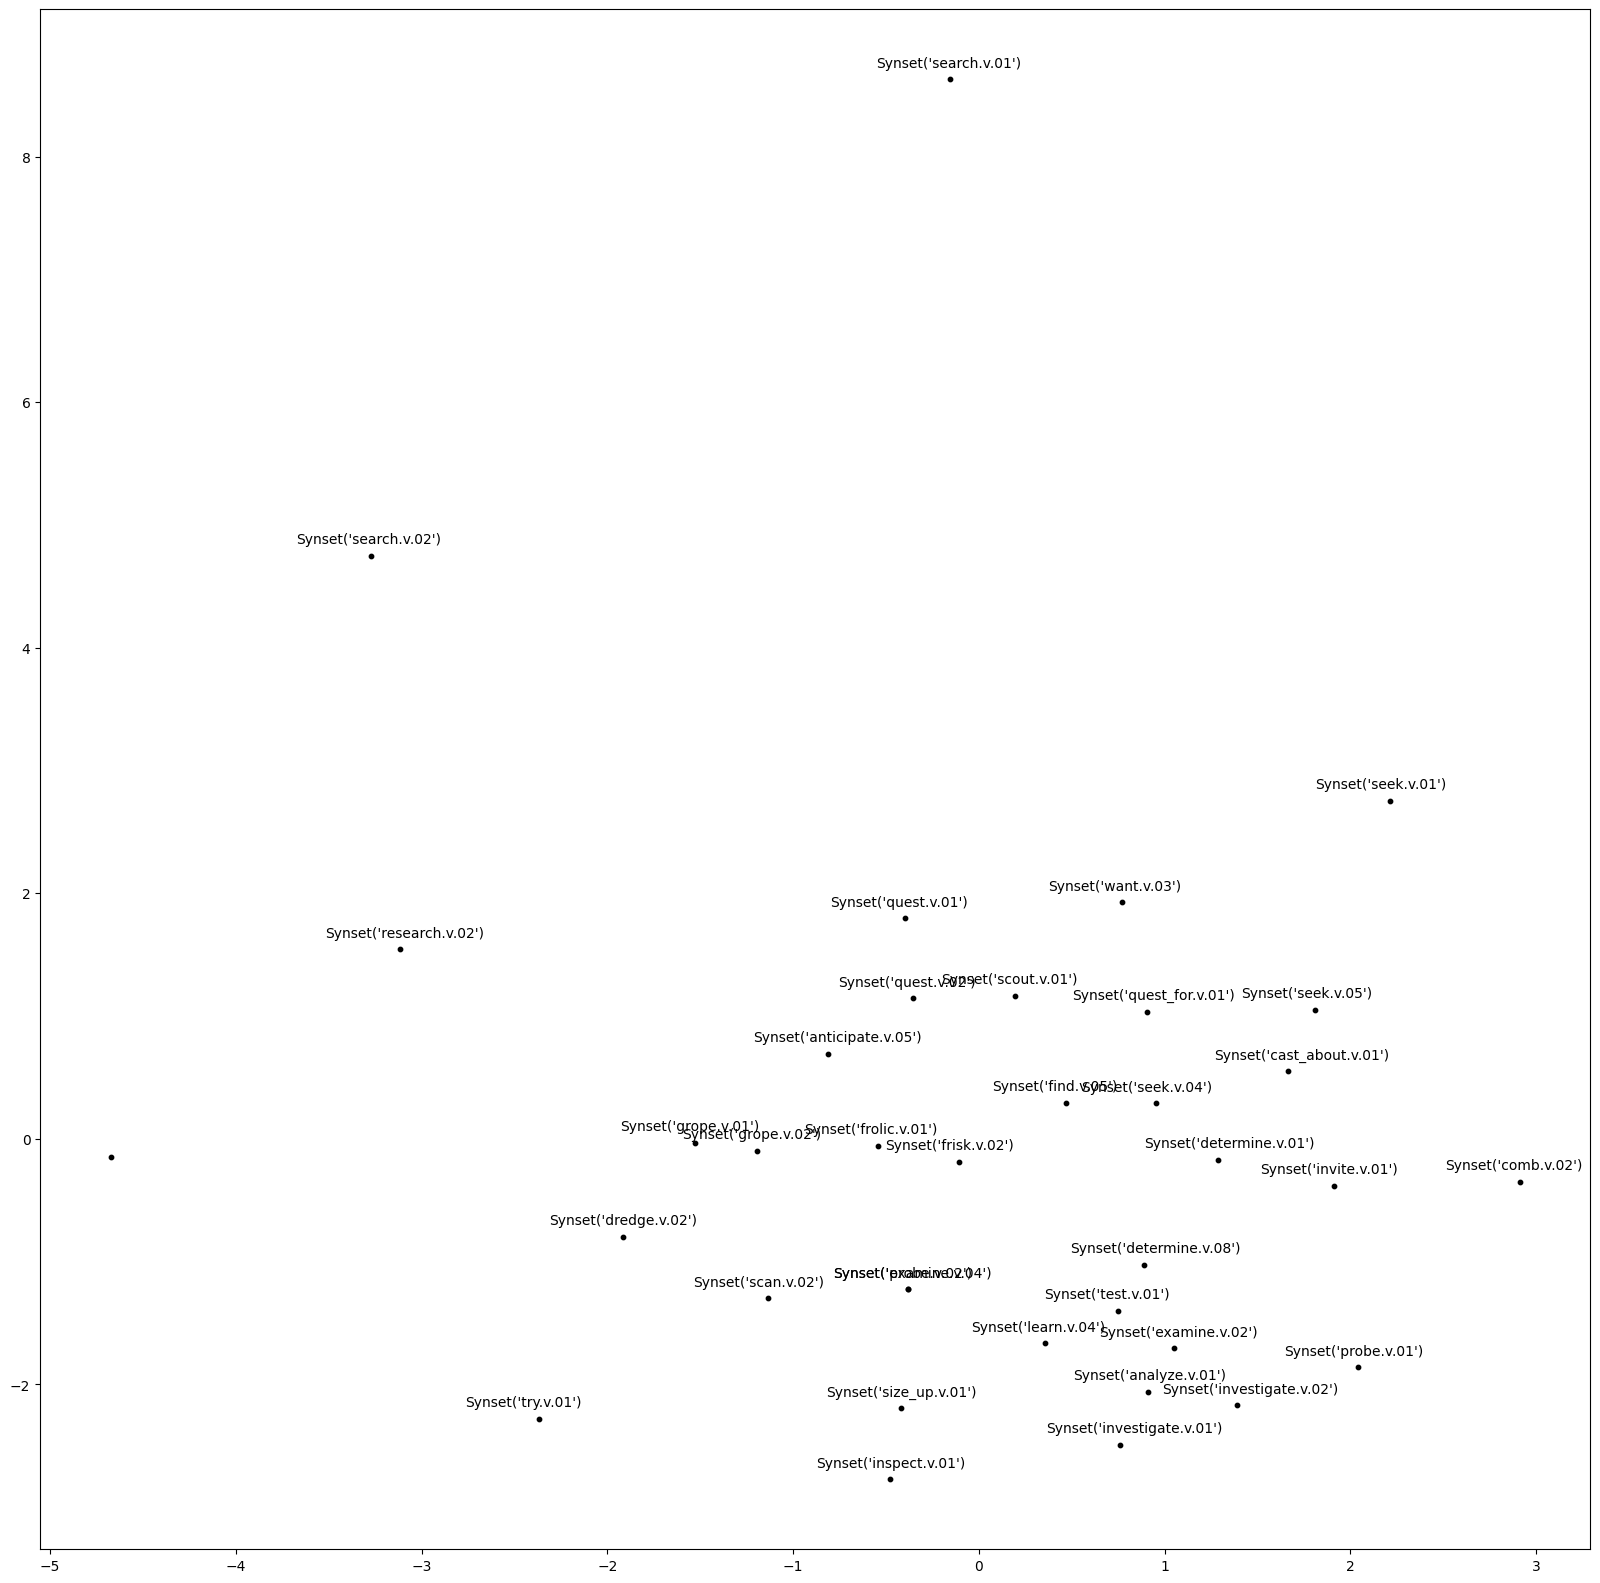

In [195]:
plt.figure(figsize=(20, 20))
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(str(phrases[i]), (x[i]-0.4, y[i]+0.1))
plt.show()

##### Шаг 3 (max 2 балла).
Проанализируйте то, что у вас получилось. Видны ли какие-то закономерности? Стали ли заметны какие-то новые закономерности, которые не были видны раньше, когда вы строили граф? Какие синсеты оказались ближе друг к другу, а какие дальше друг от друга? Кажется ли вам этот результат осмысленным?

Изначально тетрадку я создавала и работала в ней у себя в vs code, и там график не очень был понятен, так как многие из точек накладывались друг на друга. Открыв гугл коллабе, я получила хороший график, на котором только всего две пары точек, которые накладываются друг на друга.

После изучения определений каждого синтета, я не ожидала увидеть, что "search.v.02", "research.v.02", "search.v.01" "seek.v.01", "search.v.04", "try.v.01", "probe.v.01" будут стоять довольно далеко от группы синтетов на графике. Я думала, что у них у всех одно и то же значение.

Из-за того, что некоторые синтеты накладываются невозможно прочесть, но это означает, что такие синтеты имеют схожую семантику. Можно увеличить размер графика и так как в гугл коллабе можно увеличивать график при просмотре, то можно разглядеть некоторые синтеты, которые слились.

Еще можно увидеть, что выделяет группа на графике из следующих синтет:
Synset("investigate.v.02")
Synset("determin.v.08")
Synset('learn.v.04")
Synset('probe.v.01')
Synset('analyze.v.01')
Synset('examine.v.02')
Synset('test.v.01')
Synset('investigate.v.01'). Они все связаны с изучением, проведением эксперимента, анализиованием, имеют похожую семантику.

Также два синтета "frolic.v.01" "frisk.v.02" стоят на графике рядом с другом, что мне кажется странным, так как определение, которое дается у синтета "frolic.v.01" это резвиться, а у синтета "frisk.v.02" это обыскивать. Но возможно, я конечно, могла неправильно перевести/понять определение этих синтетов.

И синтеты "grope.v.02" и "grope.v.01" стоят близко друг к другу.


##### Шаг 4 (max 2 балла).
Поставьте каждому синсету в соответствие одно русское слово (вручную), возьмите любую модель с http://vectors.nlpl.eu/, вытащите оттуда вектора соответствующих слов, соберите их в одну матрицу и проделайте с ней то же, что и с «типологической» матрицей: сократите размерность до 2 методом MDS и визуализируйте результат.

In [159]:
pip install wget

In [160]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

import zipfile
import wget

In [164]:
!wget http://vectors.nlpl.eu/repository/20/180.zip
!unzip 180.zip

--2024-04-18 09:18:41--  http://vectors.nlpl.eu/repository/20/180.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484452317 (462M) [application/zip]
Saving to: ‘180.zip.2’

180.zip.2           100%[===================>] 462.01M  27.3MB/s    in 18s     

2024-04-18 09:18:59 (26.0 MB/s) - ‘180.zip.2’ saved [484452317/484452317]

Archive:  180.zip
replace meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [165]:
model = KeyedVectors.load_word2vec_format('model.bin', binary=True)

Чтобы подставить каждому синтенту аналог на русском, посмотрим сначала определение, которое дается в базе

In [197]:
for synset in final_synsets:
  print(synset, '--', synset.definition())

Synset('determine.v.08') -- find out, learn, or determine with certainty, usually by making an inquiry or other effort
Synset('probe.v.01') -- question or examine thoroughly and closely
Synset('scout.v.01') -- explore, often with the goal of finding something or somebody
Synset('quest.v.01') -- make a search (for)
Synset('grope.v.02') -- search blindly or uncertainly
Synset('investigate.v.02') -- conduct an inquiry or investigation of
Synset('seek.v.01') -- try to get or reach
Synset('search.v.04') -- subject to a search
Synset('probe.v.02') -- examine physically with or as if with a probe
Synset('scan.v.02') -- examine hastily
Synset('analyze.v.01') -- consider in detail and subject to an analysis in order to discover essential features or meaning
Synset('dredge.v.02') -- search (as the bottom of a body of water) for something valuable or lost
Synset('invite.v.01') -- increase the likelihood of
Synset('frisk.v.02') -- search as for concealed weapons by running the hands rapidly over t

In [198]:
synsets_rus_translations = {
    'find.v.05': 'находить',
    'probe.v.01': 'исследовать',
    'analyze.v.01': 'анализировать',
    'try.v.01': 'пытаться',
    'investigate.v.02': 'расследовать',
    'dredge.v.02': 'искать',
    'test.v.01': 'проверять',
    'want.v.03': 'искать',
    'search.v.01': 'искать',
    'grope.v.01': 'ощупывать',
    'quest.v.01': 'искать',
    'determine.v.08': 'определять',
    'grope.v.02': 'шарить',
    'frisk.v.02': 'обыскивать',
    'search.v.04': 'искать',
    'comb.v.02': 'прочесывать',
    'inspect.v.01': 'осматривать',
    'seek.v.01': 'искать',
    'examine.v.04': 'изучать',
    'learn.v.04': 'учиться',
    'seek.v.05': 'спрашивать',
    'determine.v.01': 'определять',
    'frolic.v.01': 'резвиться',
    'size_up.v.01': 'оценивать',
    'examine.v.02': 'осматривать',
    'search.v.02': 'искать',
    'anticipate.v.05': 'волноваться',
    'quest_for.v.01': 'расследоваться',
    'research.v.02': 'расследовать',
    'quest.v.02': 'искать',
    'seek.v.04': 'искать',
    'scan.v.02': 'осматривать',
    'investigate.v.01': 'исследовать',
    'scout.v.01': 'разведывать',
    'cast_about.v.01': 'разыскивать',
    'invite.v.01': 'увеличивать',
    'probe.v.02': 'зондировать'
}

In [199]:
import numpy as np
new_trans_ru = {}
for key, value in synsets_rus_translations.items():
    verb = str(value) + '_VERB'
    vector_verb = list(np.array(model[verb]))
    new_trans_ru[key] = vector_verb

In [200]:
vectors_list = list(new_trans_ru.values())
similarities = euclidean_distances(vectors_list)
mds = manifold.MDS(n_components=2)
array_mds_new = mds.fit_transform(vectors_list)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


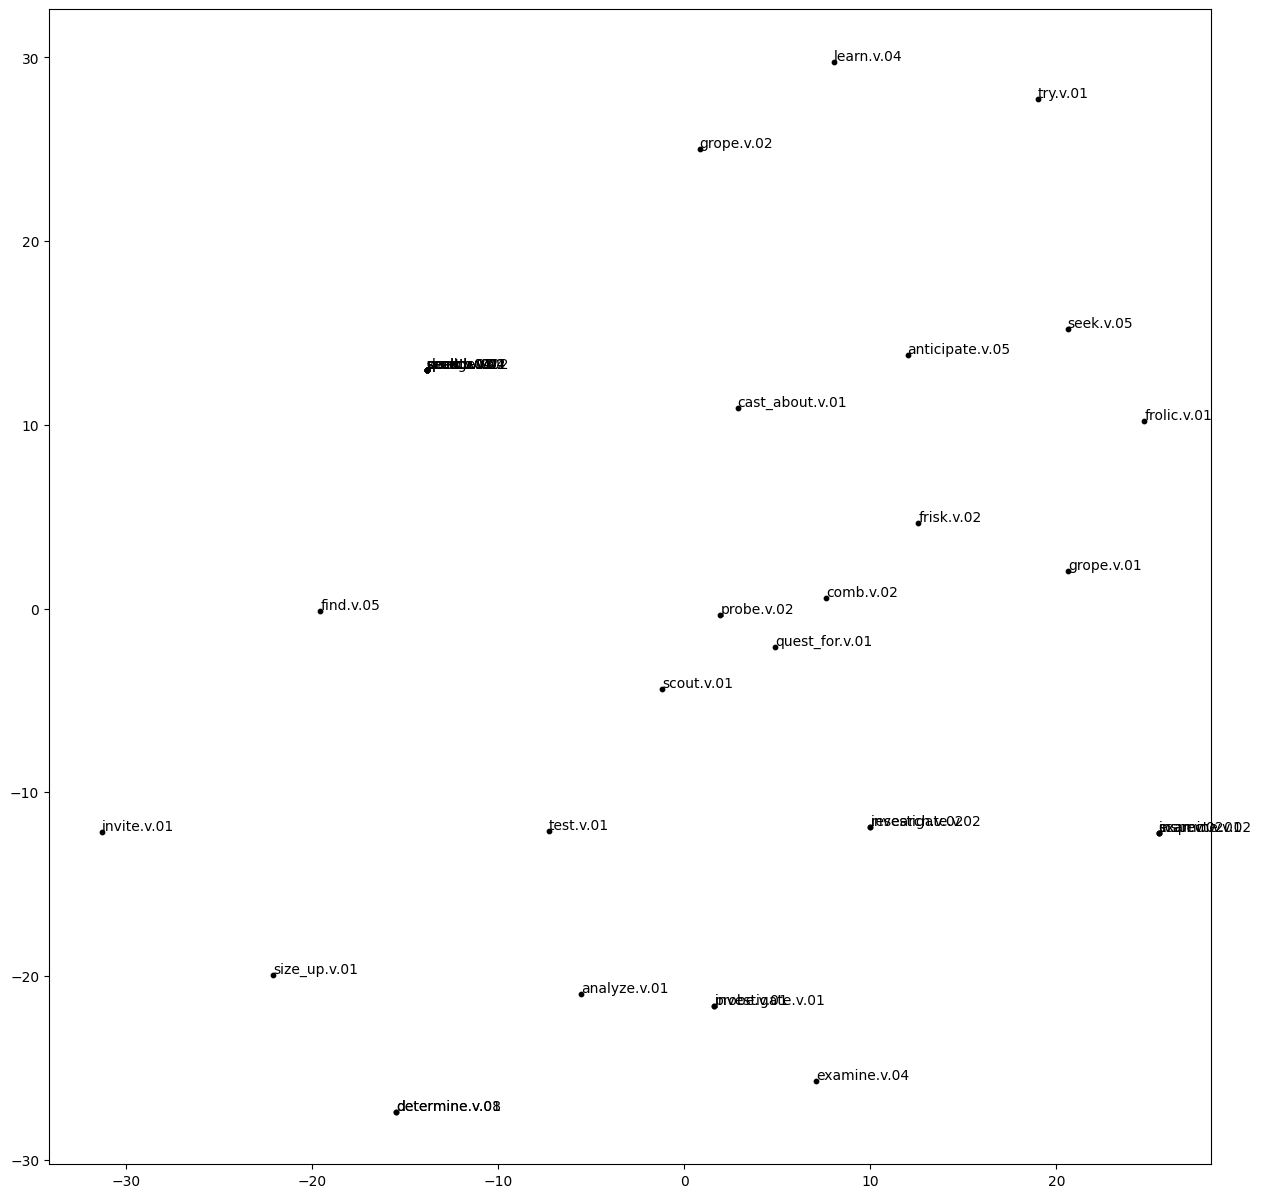

In [201]:
plt.figure(figsize=(15, 15))
for n, a in enumerate(array_mds_new):
    synt = list(new_trans_ru.keys())[n]
    coord = a
    plt.scatter(coord[0], coord[1], c = 'black', s=10)
    plt.annotate(str(synt), (coord[0], coord[1]+0.1))
plt.show()

##### Шаг 5 (max 1 балл).
Сравните две картинки: соответствует ли взаимное расположение синсетов на «типологической» карте взаимному расположению относящихся к ним русских слов в дистрибутивной модели? О чем это говорит?

Некоторые синтеты имеют один и тот же русский аналог, поэтому это нормально, что они сливаюстя на графике, так как у них один и тот же вектор.

Синтеты "examine.v.04" и "analyze.v.01" стоят близко к друг другу, у них похожая семантика, оба связаны идей "изучать что-то". Также еще выделяется группа из следующих синтетов: probe.v.02
scout.v.01
comb.v.02
quest_for.v.01. Будто у них похожая семантика "тщательно искать, изучать"

Мне кажется, что эту визуализацию можно считать более "разумной", синтеты расположены по понятным причинам лучше, чем на «типологической» карте.

##### Шаг 6 (max 1 балл)
Посчитайте попарные косинусные расстояния между всеми строками в каждой из матриц, а потом вычислите коэффициент корреляции Пирсона между этими двумя наборами данных. О чем говорит такое значение коэффициента?

In [215]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
X = 1 - cosine_similarity(array)
Y = 1 - cosine_similarity(vectors_list)

pearson_corr = np.corrcoef(X.flatten(), Y.flatten())[0,1]
print(pearson_corr)

0.30074811761868286


Мы видим, что коэффициент корреляции между этими двумя переменными составляет 0.3007. Значение 0,3007 говорит о том, что существует слабая положительная линейная зависимость между этими двумя матрицами. Значит, что наши две матрицы мало чем похожи друг на друга.


##### Шаг 7 (бонусный, max 2 балла).
Можно скачать программу Concept Explorer отсюда или любую другую из существующих имплементаций отсюда, загрузить туда «типологическую» матрицу (пример входного формата данных для этой программы можно посмотреть здесь; обратите внимание, разные реализации FCA могут требовать разных форматов входных данных) и построить по этим данным решетку формальных понятий. Проанализируйте эту решетку: есть ли от нее какой-то толк? Позволяет ли она увидеть какие-то новые закономерности в данных?

In [208]:
synsets = []
for syntet in df.index:
  synsets.append(syntet.name())

In [210]:
fca_matrix = pd.DataFrame(index=synsets, columns=df.columns)
for synset, row in df.iterrows():
  fca_matrix.loc[synset.name()] = fca_matrix.loc[synset.name()].combine_first(row)

fca_matrix = fca_matrix.groupby(level=0).max()
fca_matrix = fca_matrix.applymap(lambda x: 1 if x == 1 else 0)

In [212]:
fca_matrix

,search,seek,look_for,gjurmim,kërkim,kërkoj,استشار,استكشف,اكتشف,بحث,...,leite,søke,lete,procurar,căuta,hľadať,pátrať,iskati,söka,ค้นหา
analyze.v.01,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
anticipate.v.05,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cast_about.v.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
comb.v.02,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
determine.v.01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
determine.v.08,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
dredge.v.02,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
examine.v.02,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
examine.v.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
find.v.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


объекты в ctx формате это колонки в нашем датасете, атрибуты - это строки в датафрейме. сначала идет буква "B", потом добавляется количество объектов, и на слеюдущей строчке количество атрибутов. и через две строчки записываются названия колонке в датафрейме, сразу же после записываются определения. насколько я поняла X у нас единица, а точка это ноль. на этом запись в файл заканчивается.

In [213]:
new_matrix = fca_matrix.replace({1:"X", 0: "."})
new_matrix

,search,seek,look_for,gjurmim,kërkim,kërkoj,استشار,استكشف,اكتشف,بحث,...,leite,søke,lete,procurar,căuta,hľadať,pátrať,iskati,söka,ค้นหา
analyze.v.01,.,.,.,.,.,.,.,.,.,X,...,.,.,.,.,.,.,.,.,.,.
anticipate.v.05,.,.,X,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
cast_about.v.01,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,X,.,.,X
comb.v.02,.,.,.,.,.,X,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
determine.v.01,.,.,.,.,.,.,.,.,X,.,...,.,.,.,.,.,X,.,.,.,.
determine.v.08,.,.,.,.,.,.,.,.,X,.,...,.,.,.,.,.,.,.,.,.,.
dredge.v.02,.,.,.,.,X,.,.,.,.,.,...,.,.,.,X,.,.,.,.,.,.
examine.v.02,.,.,.,.,.,.,.,.,.,X,...,.,.,.,.,.,.,.,.,.,.
examine.v.04,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
find.v.05,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [214]:
with open('dataset.cxt', 'w', encoding='utf-8') as file:
  file.write('B\n\n')
  file.write(f"{fca_matrix.shape[1]}\n")
  file.write(f"{fca_matrix.shape[0]}\n\n")
  for name_column in fca_matrix.columns:
    file.write(name_column + '\n')

  for name_row in fca_matrix.index:
    file.write(f'{name_row}\n')

  for _, row in new_matrix.transpose().iterrows():
    file.write("".join(row) + "\n")

Вроде у нас получился файл такого формата, который нам нужен и с таким же содержанием, как и в примере. Поэтому импортируем этот файл в https://fca-tools-bundle.com/. Нужно там зарегистрироваться, перейти в my contexts, загрузить свой файл, потом нажать кнопку generate concepts, после generate concept lattice. Чтобы посмотреть на получившийся результат, надо нажать кнопку view concept lattice.

Скачать результат у меня не получается, поэтому я оставлю ссылку на свой контекст https://fca-tools-bundle.com/view-concept-lattice/6620d192ef7188ba63713159, я сделала его публичным, поэтому другой человек тоже сможет посмотреть.

Опять из-за того, что у нас много данных в датасете, читать график тяжело, так как линии опять накладываются друг на друга, и слова на графике сливаются, поэтому трудно разобрать, какие леммы есть и какие синтеты. Но легко можно заметить, что во главе всех синтетов стоит синтет "search.v.01", и он соединяется со всеми другими. Так как узлы этого графа - это наши леммы, мы можем посмотреть к какими синтетам они относятся. Заметим, что почти все леммы имееют довольно много соединений с синтетами, значит, что у них у каждой довольно много значений